In [ ]:
!unzip road_signs[1].zip 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)A

In [ ]:
train_dataset = train.flow_from_directory('road_signs/datasets/train/',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('road_signs/datasets/validation/',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'fifty': 0, 'no_parking': 1, 'stop': 2}

MODEL DESIGNING


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D  # help in convultion img
from keras.layers import MaxPooling2D, Flatten, Dense # dense layers are hidden layers

In [ ]:
model = Sequential()
model.add(Conv2D(16,(5,5),activation='relu',input_shape=(200,200,3)))   # 16 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(5,5),activation='relu'))   # 32 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))   # 64 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))  # 512 neuron in hidden layer

model.add(Dense(3,activation='softmax'))  # output layer. return 0 or 1 or 2 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,batch_size=64,epochs=15,validation_data=validation_dataset)

Epoch 1/15
10/10 [==============================] - 5s 490ms/step - loss: 4.2533 - accuracy: 0.3319 - val_loss: 1.0764 - val_accuracy: 0.3333
Epoch 2/15
10/10 [==============================] - 5s 464ms/step - loss: 1.1085 - accuracy: 0.3768 - val_loss: 1.0300 - val_accuracy: 0.3333
Epoch 3/15
10/10 [==============================] - 5s 461ms/step - loss: 1.0096 - accuracy: 0.5699 - val_loss: 0.9707 - val_accuracy: 0.6333
Epoch 4/15
10/10 [==============================] - 5s 462ms/step - loss: 0.9797 - accuracy: 0.3251 - val_loss: 0.6993 - val_accuracy: 0.7000
Epoch 5/15
10/10 [==============================] - 5s 465ms/step - loss: 0.5861 - accuracy: 0.6957 - val_loss: 0.3551 - val_accuracy: 0.8667
Epoch 6/15
10/10 [==============================] - 5s 458ms/step - loss: 0.3227 - accuracy: 0.8178 - val_loss: 0.1719 - val_accuracy: 0.9667
Epoch 7/15
10/10 [==============================] - 5s 468ms/step - loss: 0.1993 - accuracy: 0.9210 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

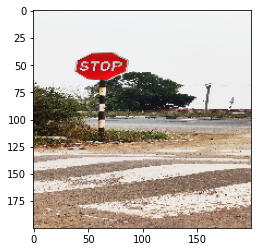

In [ ]:
img = load_img('road_signs/datasets/testing/Stop-sign-board-on-a-road-268172-pixahive.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
XX = img_to_array(img)
XX = np.expand_dims(XX,axis=0)
images = np.vstack([XX])
val = model.predict(XX)

RECOGNIZING IMAGES 


In [ ]:
if(val[0][0]==1):
  print("50 limit sign")
elif val[0][1] == 1:
  print("No parking sign detected")
elif val[0][2] == 1:
  print("STOP sign detected")


50 limit sign


In [ ]:
val